In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [18]:
# Set global plot style settings
plt.rcParams['axes.grid'] = False  # Disable grid for all plots
plt.rcParams['axes.facecolor'] = 'white'  # Set background color to white
plt.rcParams['figure.facecolor'] = 'white'  # Set figure background color to white
sns.set_style("white")  # Use Seaborn's white style to remove spines by default
sns.despine()  # Remove all spines globally

<Figure size 640x480 with 0 Axes>

In [19]:
#Load the samples from CSV file
latency_df = pd.read_csv('../network_latency_50_samples.csv')

# Reconstruct the parameters used for transformation
network_params = {
    'VGG16': {'min': 90.6, 'max': 5026.8},
    'Vision Transformer': {'min': 118.8, 'max': 10287.6}
}



In [20]:


shape_parameter = 1
samples = np.random.default_rng(seed=123456789).weibull(shape_parameter, 50)
min_sample = np.min(samples)
max_sample = np.max(samples)

# Determine global min and max values
global_min = min(params['min'] for params in network_params.values())
global_max = max(params['max'] for params in network_params.values())


# Linear transformation parameters for different networks
def get_transformation_params(min_val, max_val):
    a = (max_val - min_val) / (max_sample - min_sample)
    b = max_val - a * max_sample
    return a, b





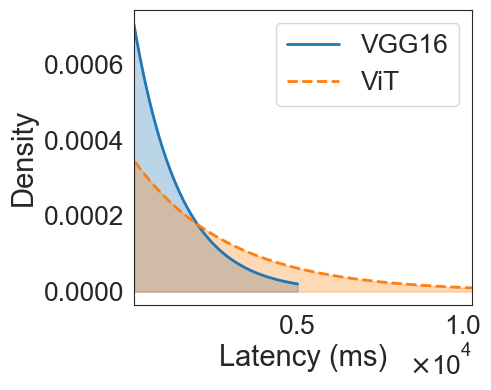

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from scipy.stats import weibull_min

# Define font sizes
scale_fonts = 7
label_font_size = 14 + scale_fonts
title_font_size = 16 + scale_fonts
tick_font_size = 12 + scale_fonts
legend_font_size = 12 + scale_fonts
offset_font_size = 12 + scale_fonts

# Plot the PDFs
fig, ax = plt.subplots(figsize=(5, 4))
colors = ['tab:blue', 'tab:orange']
labels = ['VGG16', 'ViT']  # Define the labels for the legend
linestyles = ['-', '--']  # Solid line for the first plot, dashed line for the second

for i, (network, params) in enumerate(network_params.items()):
    min_val = params['min']
    max_val = params['max']
    a, b = get_transformation_params(min_val, max_val)

    # Generate x values for the PDF
    x = np.linspace(min_val, max_val, 1000)

    # Inverse transformation to get original scale
    original_x = (x - b) / a

    # Calculate the PDF of the original Weibull distribution
    pdf = weibull_min.pdf(original_x, shape_parameter)

    # Adjust the PDF for the scaling
    scaled_pdf = pdf / a

    # Plot the reconstructed PDF and fill the area under the curve
    ax.plot(x, scaled_pdf, linestyle=linestyles[i], lw=2, label=labels[i], color=colors[i])  # Use linestyles array
    ax.fill_between(x, scaled_pdf, color=colors[i], alpha=0.3)

# Scale the x-axis and set limits
ax.set_xlim(global_min, global_max)
#plt.xscale('log')
# Add labels and legend with updated font sizes
ax.set_xlabel('Latency (ms)', fontsize=label_font_size)
ax.set_ylabel('Density', fontsize=label_font_size)
ax.legend(fontsize=legend_font_size)
ax.tick_params(axis='x', labelsize=tick_font_size)
ax.tick_params(axis='y', labelsize=tick_font_size)

# Apply scientific notation with MathText to the x-axis
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax.xaxis.get_offset_text().set_fontsize(offset_font_size)

# Apply tight layout
plt.tight_layout()

# Save the plot
plt.savefig('request_samples.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()
